# Main

In [ ]:
import subprocess
import time
import matplotlib.pyplot as plt
import numpy as np
from math import pi, cos, sin

def plotSimulationGraphs(data):
    plt.figure(1, (16, 12))
    plt.subplot(3, 3, 1)
    plt.plot(data["time"], data["drag"])
    plt.title("Drag / Time")
    plt.subplot(3, 3, 2)
    plt.plot(data["time"], data["altitude"])
    plt.title("Altitude")
    plt.subplot(3, 3, 3)
    plt.plot(data["time"], data["speed"])
    plt.title("Speed")
    plt.subplot(3, 3, 5)
    plt.plot(data["time"], data["thrust"])
    plt.title("Thrust")
    plt.subplot(3, 3, 6)
    plt.plot(data["time"], data["mass"])
    plt.title("Mass")
    plt.subplot(3, 3, 4)
    plt.plot(data["time"], data["angle"])
    plt.title("Angle")
    plt.show()

def main(deltaTime = .1, simulationTime = 2e4, dataCollectionInterval = 10, showScene: bool = False, showGraphs: bool = False, printOutput: bool = False, collectData = False, maxDataTime: float = 1e10, time_angle_pairs = []):
    if time_angle_pairs == []: result = subprocess.run(["./Program.exe"], input=f'{deltaTime} {simulationTime} {dataCollectionInterval} 0\n0', capture_output=True, text=True)
    else: result = subprocess.run(["./Program.exe"], input=f'{deltaTime} {simulationTime} {dataCollectionInterval} {len(time_angle_pairs)//2}\n{'\n'.join([f'{time_angle_pairs[2*i]} {time_angle_pairs[2*i+1]}' for i in range(len(time_angle_pairs)//2)])} \n0', capture_output=True, text=True)

    sts = result.stdout

    h = sts.split("\n")[1:]

    minMaxAltitude = [10e10, 0]

    if printOutput:
        print(*h[:min(len(h), int(maxDataTime / dataCollectionInterval))], sep="\n")

    sts = sts.replace("\n", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ")

    tt = sts.split(" ")

    g = " ".join(h[min(len(h)-1, int(1_000 / dataCollectionInterval)):]).replace("\n", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").split(" ")

    for i, el in enumerate(g):
        if el == "Altitude:":
            altitude = float(g[i + 1])
            minMaxAltitude[0] = min(minMaxAltitude[0], altitude)
            minMaxAltitude[1] = max(minMaxAltitude[1], altitude)
    
    data = {"time": [], "drag": [], "altitude": [], "speed": [], "thrust": [], "mass": [], "angle": []}

    if showGraphs or showScene or collectData:
        xs = []
        ys = []
        times = []

        for i, el in enumerate(tt):
            if el == "Time:":
                if float(tt[i + 1]) > maxDataTime:
                    break
                times.append(float(tt[i + 1]))
            if el == "Speed:":
                speedx = float(tt[i + 2][:-1] if tt[i + 2][-1] == ',' else tt[i + 2])
                speedy = float(tt[i + 3][:-1] if tt[i + 3][-1] == ')' else tt[i + 3])
                data["speed"].append((speedx**2 + speedy**2)**.5)
            if el == "Position:":
                xs.append(float(tt[i + 2][:-1] if tt[i + 2][-1] == ',' else tt[i + 2]))
                ys.append(float(tt[i + 3][:-1] if tt[i + 3][-1] == ')' else tt[i + 3]))
            if el == "Altitude:":
                data["altitude"].append(float(tt[i + 1]))
            if el == "Drag:":
                data["drag"].append(float(tt[i + 1]) if float(tt[i + 1]) < 1e10 else 0)
            if el == "Thrust:":
                data["thrust"].append(float(tt[i + 1]) if float(tt[i + 1]) < 1e10 else 0)
            if el == "Mass:":
                data["mass"].append(float(tt[i + 1]) if float(tt[i + 1]) < 1e10 else 0)
            if el == "Angle:":
                data["angle"].append(90 - float(tt[i + 1]))

        data["time"] = times.copy()
    
    if showScene:
        for i in range(1000):
            pos = [cos(i / 500 * pi) * 6_378_000, sin(i / 500 * pi) * 6_378_000 - 6_378_000]
            xs.append(float(pos[0]))
            ys.append(float(pos[1]))
            times.append(-simulationTime/2)

        plt.figure(2, (10, 8))
        plt.scatter(np.array(xs), np.array(ys), c=np.array(times), cmap='viridis')
        plt.colorbar()
        plt.title("Scene")
        plt.show()

    if showGraphs:
        plotSimulationGraphs(data)

    if printOutput:
        print(f'Min altitude: {minMaxAltitude[0]}')
        print(f'Max altitude: {minMaxAltitude[1]}')
    
    success = h[-2] != "System has been stopped with message: \"Rocket has been crushed\"" if len(h) > 1 else "\"Rocket has been crushed\""

    return {"output": sts, "minMaxAltitude": minMaxAltitude, "success": success, "data": data}


### Visualization

Time:    0.00 | Mass:    562201 | FuelMass:    409500 | Speed: (        0.00,         0.00) | Position: (          0.00,         121.00) | Angle: 00.0 | Altitude:         121 | Drag:         0 | Thrust: 0.00
Time:    0.90 | Mass:    559786 | FuelMass:    407085 | Speed: (      407.66,         3.07) | Position: (        366.87,         122.54) | Angle: 00.3 | Altitude:         123 | Drag:        30 | Thrust: 7424171.46
Time:    1.90 | Mass:    557103 | FuelMass:    404402 | Speed: (      407.79,         6.53) | Position: (        774.60,         127.54) | Angle: 00.7 | Altitude:         128 | Drag:       154 | Thrust: 7424528.01
Time:    2.90 | Mass:    554420 | FuelMass:    401719 | Speed: (      408.00,        10.06) | Position: (       1182.49,         136.07) | Angle: 01.1 | Altitude:         136 | Drag:       381 | Thrust: 7425154.27
Time:    3.90 | Mass:    551736 | FuelMass:    399035 | Speed: (      408.30,        13.66) | Position: (       1590.64,         148.20) | Angle: 01.4

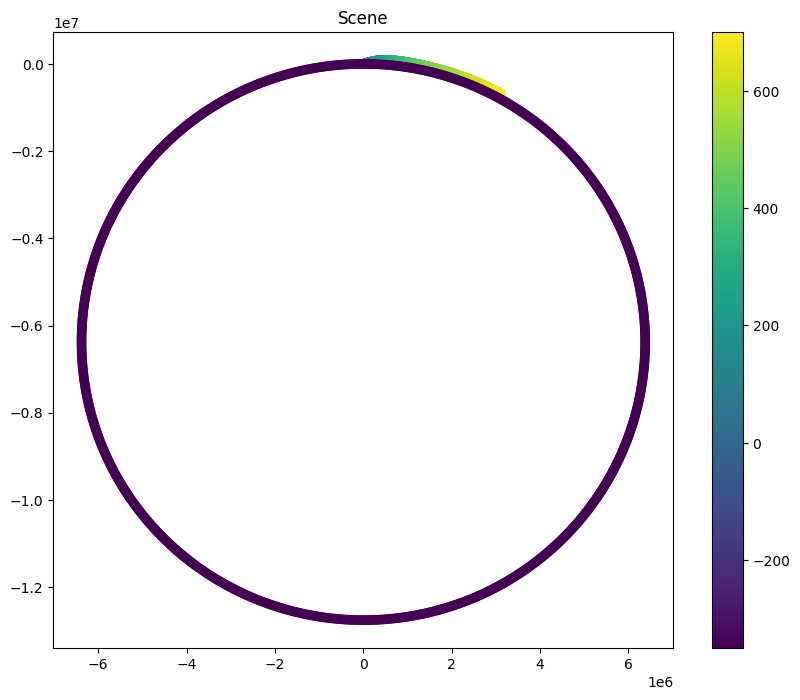

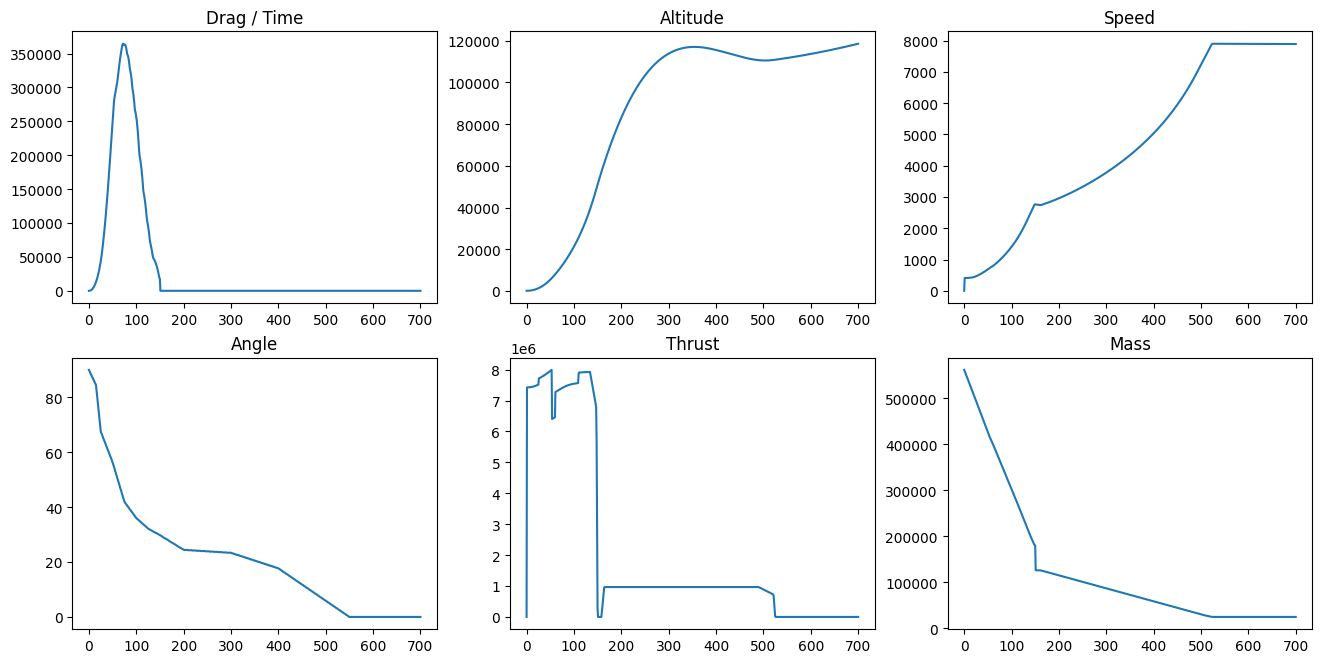

Min altitude: 100000000000.0
Max altitude: 0


In [8]:
time_angle_pairs = [0, 0, 15, 5.55, 25, 22.49, 50, 33.67, 75, 48.08, 100, 53.98, 125, 57.82, 150, 60.23, 200, 65.56, 300, 66.65, 400, 72.3, 550, 90]
out = main(showScene=True, showGraphs=True, printOutput=True, deltaTime=.1, dataCollectionInterval=1, simulationTime=700, time_angle_pairs=time_angle_pairs)

Time:    0.00 | Mass:    562201 | FuelMass:    409500 | Speed: (        0.00,         0.00) | Position: (          0.00,         121.00) | Angle: 00.0 | Altitude:         121 | Drag:         0 | Thrust: 0.00
Time:    9.90 | Mass:    535636 | FuelMass:    382935 | Speed: (      412.01,        36.58) | Position: (       4050.05,         299.94) | Angle: 03.7 | Altitude:         301 | Drag:      5263 | Thrust: 7437501.66
Time:   19.90 | Mass:    508797 | FuelMass:    356096 | Speed: (      429.96,        79.48) | Position: (       8238.28,         883.01) | Angle: 13.9 | Altitude:         888 | Drag:     25132 | Thrust: 7480767.89
Time:   29.90 | Mass:    481623 | FuelMass:    328922 | Speed: (      484.67,       123.39) | Position: (      12785.71,        1903.89) | Angle: 24.7 | Altitude:        1917 | Drag:     70235 | Thrust: 7746003.82
Time:   39.90 | Mass:    454068 | FuelMass:    301367 | Speed: (      559.15,       171.29) | Position: (      17991.85,        3389.55) | Angle: 29.2

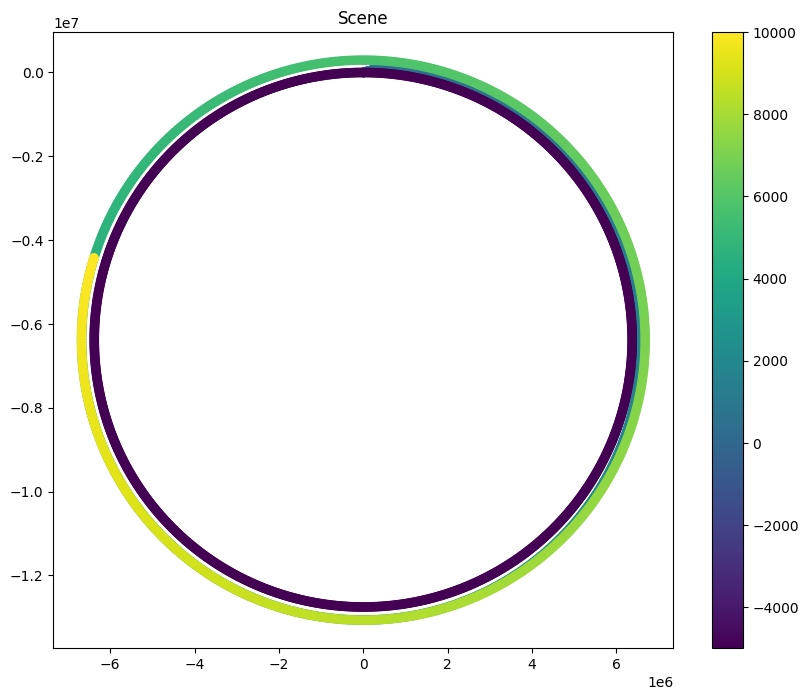

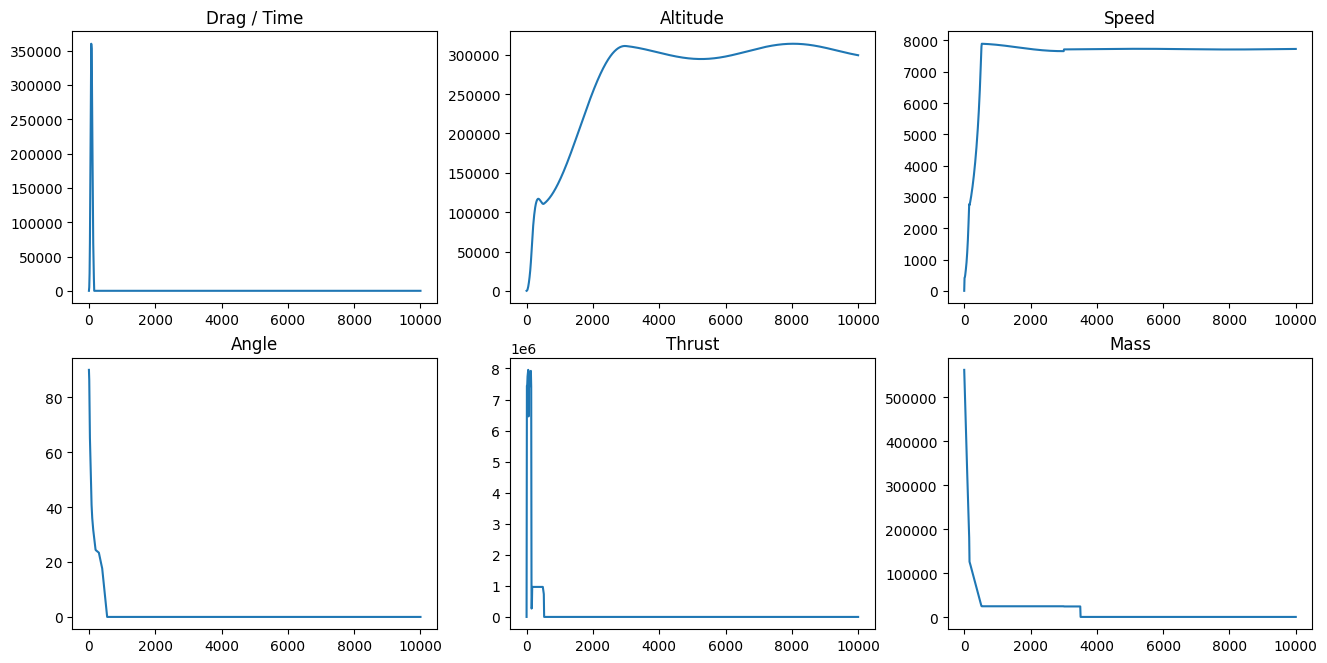

Min altitude: 140571.0
Max altitude: 314032.0


In [5]:
time_angle_pairs = [0, 0, 15, 5.55, 25, 22.49, 50, 33.67, 75, 48.08, 100, 53.98, 125, 57.82, 150, 60.23, 200, 65.56, 300, 66.65, 400, 72.3, 550, 90]
out = main(showScene=True, showGraphs=True, printOutput=True, deltaTime=.1, dataCollectionInterval=10, simulationTime=10000, time_angle_pairs=time_angle_pairs)

Time:    0.00 | Mass:    562201 | FuelMass:    409500 | Speed: (        0.00,         0.00) | Position: (          0.00,         121.00) | Angle: 00.0 | Altitude:         121 | Drag:         0 | Thrust: 0.00
Time:  999.90 | Mass:     25011 | FuelMass:      2110 | Speed: (    -1134.81,     -7778.37) | Position: (    4955482.50,    -2143031.87) | Angle: 90.0 | Altitude:      140571 | Drag:         0 | Thrust: 0.00
Time: 1999.90 | Mass:     25011 | FuelMass:      2110 | Speed: (    -4536.57,      6255.92) | Position: (    5885450.71,    -9432799.21) | Angle: 90.0 | Altitude:      253013 | Drag:         0 | Thrust: 0.00
Time: 2999.90 | Mass:     25011 | FuelMass:      2110 | Speed: (     7604.69,      -917.13) | Position: (    -399740.41,   -13055166.63) | Angle: 90.0 | Altitude:      311122 | Drag:         0 | Thrust: 0.00
Time: 3999.90 | Mass:       801 | FuelMass:         1 | Speed: (    -5850.76,     -5044.18) | Position: (   -6261021.93,    -8708440.57) | Angle: 90.0 | Altitude:      

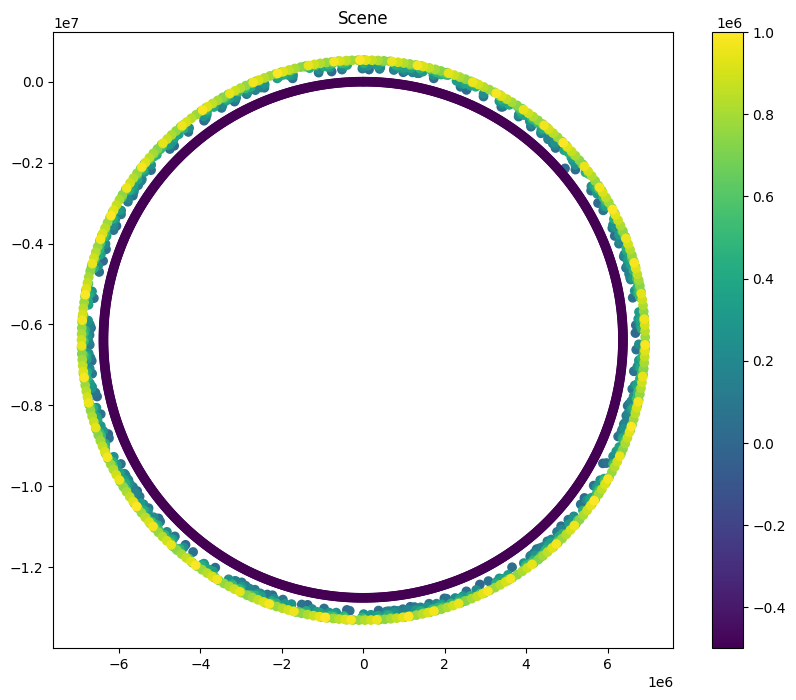

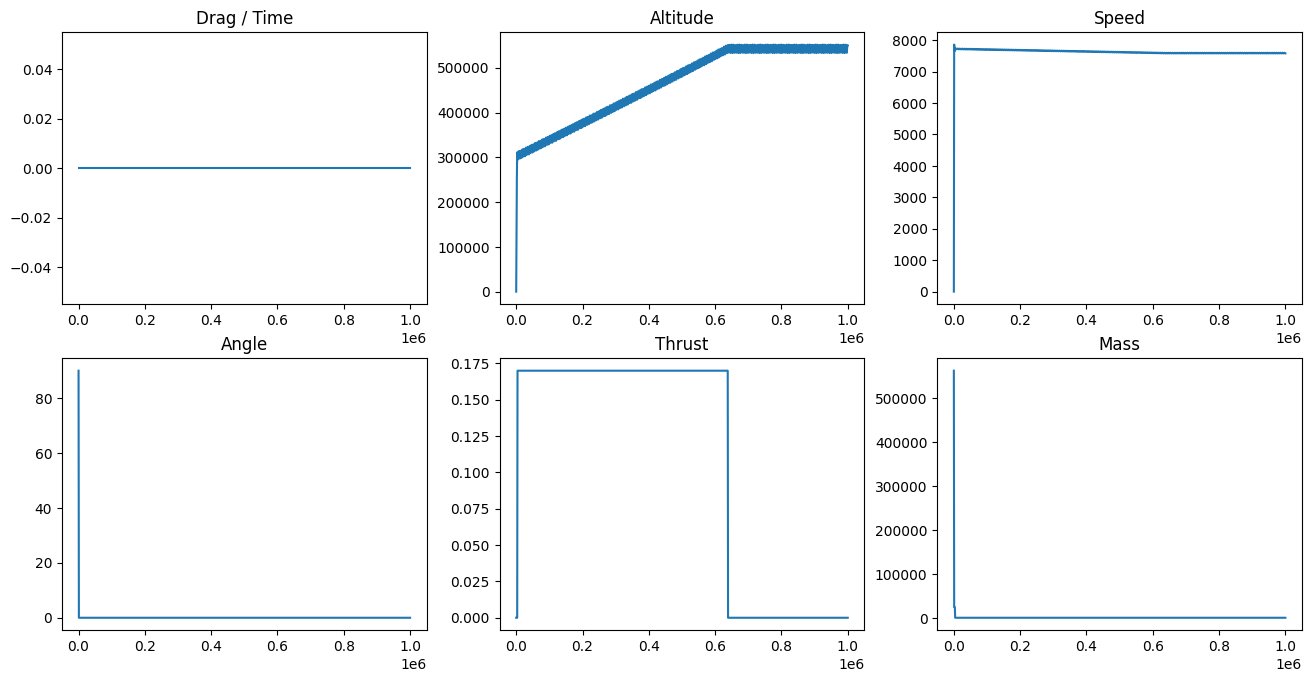

Min altitude: 140571.0
Max altitude: 551771.0


In [6]:
time_angle_pairs = [0, 0, 15, 5.55, 25, 22.49, 50, 33.67, 75, 48.08, 100, 53.98, 125, 57.82, 150, 60.23, 200, 65.56, 300, 66.65, 400, 72.3, 550, 90]
out = main(showScene=True, showGraphs=True, printOutput=True, deltaTime=.1, dataCollectionInterval=1000, simulationTime=1000000, time_angle_pairs=time_angle_pairs)